<a href="https://colab.research.google.com/github/samTeouri/LogicFlow/blob/main/PerformanceLogiqueFloue.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Performance exam dans le flou avec skfuzzy

Les *soft skills* (cooperation, QE (quotient émotionnel)) sont de plus en plus pris en compte avec les classiques *hard skills* (notes, QI (quotient intellectuel)). L'objectif est de pouvoir représenter des règles de type :
- Si les notes sont faibles ET le temps d'étude est faible ET la participation est faible, ALORS la performance est faible.
- Si les notes sont moyennes ET le temps d'étude est moyen ET la participation est moyenne, ALORS la performance est moyenne.
- Si les notes sont élevées ET le temps d'étude est élevé ET la participation est élevée, ALORS la performance est élevée.
- Si les notes sont faibles ET le temps d'étude est élevé ET la participation est élevée, ALORS la performance est moyenne.
- Si les notes sont élevées ET le temps d'étude est faible ET la participation est élevée, ALORS la performance est élevée.
- Si les notes sont moyennes ET le temps d'étude est faible ET la participation est faible, ALORS la performance est faible.
- Si les notes sont faibles ET le temps d'étude est moyen ET la participation est élevée, ALORS la performance est moyenne.
- Si les notes sont élevées ET le temps d'étude est élevé ET la participation est faible, ALORS la performance est moyenne.
- Si les notes sont moyennes ET le temps d'étude est élevé ET la participation est faible, ALORS la performance est faible.

où 'notes' est la moyenne des notes obtenues par la personne (entre 0 et 20), 'temps d'étude' est la durée du travail personnel par semaine (entre 0 et 30), 'participation' est la participation orale, au travail de groupe (entre 0 et 100%), et performance (entre 0 et 100) est la performance attendue de la personne dans le monde réel.


Reprenez les exemples d'utilisation de la logique floue et adaptez les à ce problème

On utilise pour cela la librairie python skfuzzy
*(si elle n'est pas présente, installez là avec cette ligne : !pip install -U scikit-fuzzy)*

In [1]:
%pip install -U scikit-fuzzy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 920.8/920.8 kB 5.0 MB/s eta 0:00:00


In [2]:
#les imports
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl


## les antécédents et les conséquents


In [3]:
note = ctrl.Antecedent(np.arange(0,20.5,0.5), 'note')
temps_etude = ctrl.Antecedent(np.arange(0,31,1), 'temps_etude')
participation = ctrl.Antecedent(np.arange(0,101,1), 'participation')

performance = ctrl.Consequent(np.arange(0,101,1), 'performance')

Définition des ensembles flous

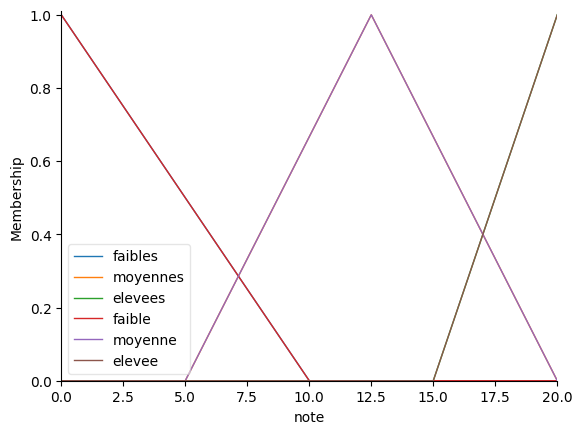

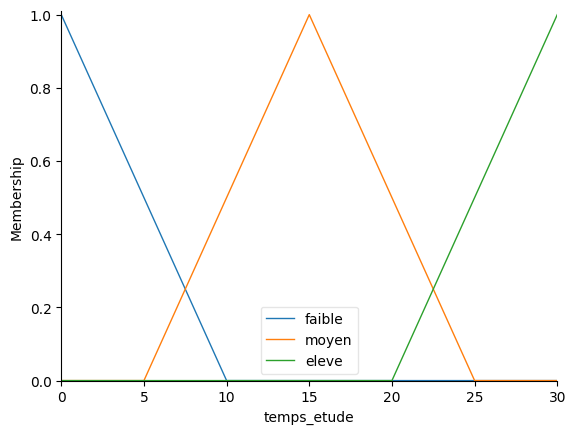

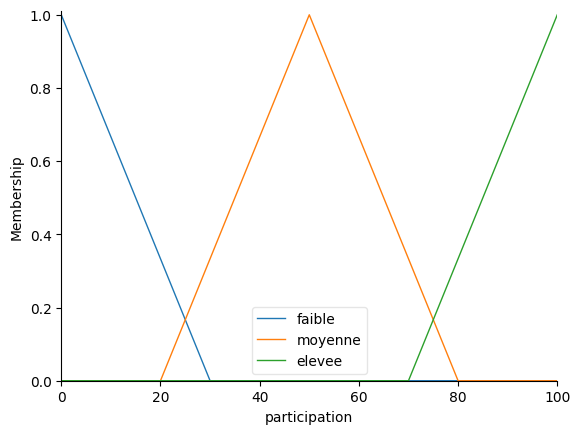

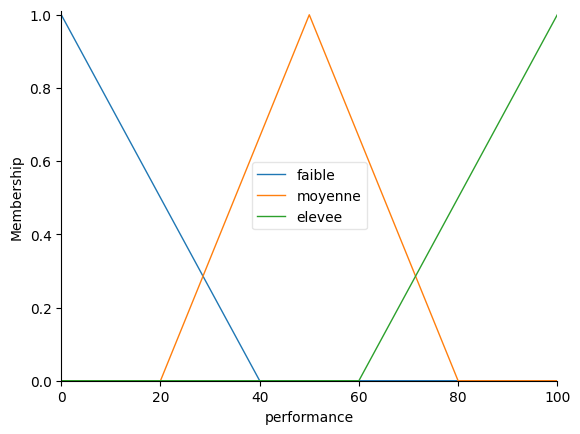

In [9]:
note['faible'] = fuzz.trimf(note.universe, [0, 0, 10])
note['moyenne'] = fuzz.trimf(note.universe, [5, 12.5, 20])
note['elevee'] = fuzz.trimf(note.universe, [15, 20, 20])

temps_etude['faible'] = fuzz.trimf(temps_etude.universe, [0, 0, 10])
temps_etude['moyen'] = fuzz.trimf(temps_etude.universe, [5, 15, 25])
temps_etude['eleve'] = fuzz.trimf(temps_etude.universe, [20, 30, 30])

participation['faible'] = fuzz.trimf(participation.universe, [0, 0, 30])
participation['moyenne'] = fuzz.trimf(participation.universe, [20, 50, 80])
participation['elevee'] = fuzz.trimf(participation.universe, [70, 100, 100])

performance['faible'] = fuzz.trimf(performance.universe, [0, 0, 40])
performance['moyenne'] = fuzz.trimf(performance.universe, [20, 50, 80])
performance['elevee'] = fuzz.trimf(performance.universe, [60, 100, 100])

note.view()
temps_etude.view()
participation.view()
performance.view()



Définition des règles floues

In [10]:
regle1 = ctrl.Rule(note['faible'] & temps_etude['faible'] & participation['faible'], performance['faible'])
regle2 = ctrl.Rule(note['moyenne'] & temps_etude['moyen'] & participation['moyenne'], performance['moyenne'])
regle3 = ctrl.Rule(note['elevee'] & temps_etude['eleve'] & participation['elevee'], performance['elevee'])
regle4 = ctrl.Rule(note['faible'] & temps_etude['eleve'] & participation['elevee'], performance['moyenne'])
regle5 = ctrl.Rule(note['elevee'] & temps_etude['faible'] & participation['elevee'], performance['elevee'])
regle6 = ctrl.Rule(note['moyenne'] & temps_etude['faible'] & participation['faible'], performance['faible'])
regle7 = ctrl.Rule(note['faible'] & temps_etude['moyen'] & participation['elevee'], performance['moyenne'])
regle8 = ctrl.Rule(note['elevee'] & temps_etude['eleve'] & participation['faible'], performance['moyenne'])
regle9 = ctrl.Rule(note['moyenne'] & temps_etude['eleve'] & participation['faible'], performance['faible'])

Création du système

In [11]:
systeme_controle = ctrl.ControlSystem([regle1, regle2, regle3, regle4, regle5, regle6, regle7, regle8, regle9])
systeme = ctrl.ControlSystemSimulation(systeme_controle)

Simulation

Performance prédite : 84.44444444444444


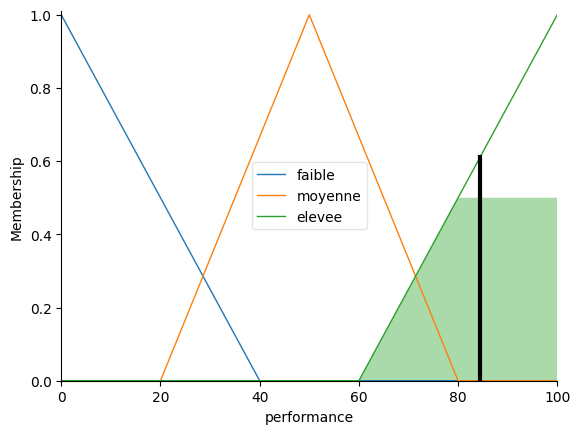

In [13]:
systeme.input['note'] = 18
systeme.input['temps_etude'] = 25
systeme.input['participation'] = 90

systeme.compute()

print("Performance prédite :", systeme.output['performance'])
performance.view(sim=systeme)